In [109]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import random
import os
os.environ['R_HOME'] = 'C:\Programming\R\R-4.4.2'

In [110]:
# 재현성 난수 고정
SEED = 100

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(SEED)
np.random.seed(SEED)

In [111]:
# data load
df_name = 'molproperty_vd'
df = pd.read_csv('C:\Programming\Github\EGCN\data\\' + df_name + '.csv')

smiles_list = df['smiles'].tolist()

# target 정의
target1 = df.iloc[:,1]
target = target1.dropna()
print(smiles_list[:5])
print(target[:5])

['C=O', 'CNN', 'C(=O)O', 'CCl', 'CN']
0    1.04
1    1.60
2    1.60
3    1.80
4    1.07
Name: vapor density_v1, dtype: float64


In [112]:
# 분자 특성 추출 class
class MolecularFeatureExtractor:
    def __init__(self):
        self.descriptors = [desc[0] for desc in Descriptors._descList]

    def extract_molecular_features(self, smiles_list):
        features_dict = {desc: [] for desc in self.descriptors}

        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                for descriptor_name in self.descriptors:
                    descriptor_function = getattr(Descriptors, descriptor_name)
                    try:
                        features_dict[descriptor_name].append(descriptor_function(mol))
                    except:
                        features_dict[descriptor_name].append(None)
            else:
                for descriptor_name in self.descriptors:
                    features_dict[descriptor_name].append(None)

        return pd.DataFrame(features_dict)

In [113]:
# 분자 특성 추출 및 데이터프레임 정의
extractor = MolecularFeatureExtractor()
df_all_features = extractor.extract_molecular_features(smiles_list)

df_all_features['target'] = target
df_all_features

[19:58:18] SMILES Parse Error: syntax error while parsing: FH
[19:58:18] SMILES Parse Error: Failed parsing SMILES 'FH' for input: 'FH'
[19:58:18] Explicit valence for atom # 1 Br, 5, is greater than permitted
[19:58:18] WARNING: not removing hydrogen atom without neighbors
[19:58:18] WARNING: not removing hydrogen atom without neighbors
[19:58:18] WARNING: not removing hydrogen atom without neighbors


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.040
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.800
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0.000000,0.332023,33.998,30.974,33.997237,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170
98,0.000000,0.000000,0.000000,0.000000,0.365164,36.461,35.453,35.976678,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268
99,0.000000,0.000000,0.000000,0.000000,0.356420,34.083,32.067,33.987721,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.189
100,1.500000,1.500000,1.500000,1.500000,0.422316,84.162,72.066,84.093900,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.980


In [114]:
num_all_features = df_all_features.shape[1] - 1  # logvp 열 제외
print("초기 변수 개수:", num_all_features)

초기 변수 개수: 208


# 1. NA Handling

In [115]:
df_all_features.dropna(inplace = True)

In [116]:
# NA 확인
df_all_features[df_all_features.isna().any(axis = 1)]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target


In [117]:
# 결측치가 포함된 feature 개수
print('결측치가 포함된 열 개수:', df_all_features.isna().any(axis = 0).sum(), '\n')
print(df_all_features.isna().any(axis = 0))

결측치가 포함된 열 개수: 0 

MaxEStateIndex       False
MinEStateIndex       False
MaxAbsEStateIndex    False
MinAbsEStateIndex    False
qed                  False
                     ...  
fr_thiocyan          False
fr_thiophene         False
fr_unbrch_alkane     False
fr_urea              False
target               False
Length: 209, dtype: bool


In [118]:
# 결측치가 포함된 feature 제거
df_removed_features = df_all_features.dropna(axis = 1)
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features)

제거 후 남은 feature 개수: 208


In [119]:
# 결측치가 제거된 data frame
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.040
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.800
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0.000000,0.332023,33.998,30.974,33.997237,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170
98,0.000000,0.000000,0.000000,0.000000,0.365164,36.461,35.453,35.976678,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268
99,0.000000,0.000000,0.000000,0.000000,0.356420,34.083,32.067,33.987721,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.189
100,1.500000,1.500000,1.500000,1.500000,0.422316,84.162,72.066,84.093900,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.980


# 2. nunique == 1 인 경우

In [120]:
unique_columns = list(df_removed_features.loc[:, df_removed_features.nunique() == 1].columns)
print('nunique == 1인 feature : \n', unique_columns, '\n')

# nunique == 1인 feature 제거
#df_removed_features.drop(columns = unique_columns, inplace = True)
df_removed_features = df_removed_features.drop(columns = unique_columns).copy()

num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)


nunique == 1인 feature : 
 ['SMR_VSA8', 'SlogP_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'NumAromaticHeterocycles', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_HOCCN', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_alkyl_carbamate', 'fr_amidine', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_furan', 'fr_guanido', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isothiocyan', 'fr_lactam', 'fr_lactone', 'fr_morpholine', 'fr_oxazole', 'fr_oxime', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_urea'] 

제거 후 남은 feature 개수: 159 

(93, 160)


In [121]:
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_sulfide,fr_unbrch_alkane,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.040
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.800
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0.000000,0.332023,33.998,30.974,33.997237,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170
98,0.000000,0.000000,0.000000,0.000000,0.365164,36.461,35.453,35.976678,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268
99,0.000000,0.000000,0.000000,0.000000,0.356420,34.083,32.067,33.987721,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.189
100,1.500000,1.500000,1.500000,1.500000,0.422316,84.162,72.066,84.093900,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.980


# 3. 너무 낮은 variance를 가지는 경우

In [122]:
df_removed_features.var()

MaxEStateIndex            11.341483
MinEStateIndex             4.763012
MaxAbsEStateIndex         11.341483
MinAbsEStateIndex          2.166473
qed                        0.008652
                            ...    
fr_phenol_noOrthoHbond     0.031557
fr_piperdine               0.096774
fr_sulfide                 0.021272
fr_unbrch_alkane           0.053296
target                     3.607236
Length: 160, dtype: float64

In [123]:
low_variances = sorted(df_removed_features.var())
low_variances[:10]

[0.008651768611273454,
 0.01071814139180694,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043015,
 0.010752688172043015,
 0.010752688172043015,
 0.010752688172043015]

In [124]:
columns_low_variances = []

for i in low_variances:
    if i < 0.001:
        column = df_removed_features.loc[:, df_removed_features.var() == i].columns
        columns_low_variances.append(column)
columns_low_variances = [item for index in columns_low_variances for item in index]

# 2. 중복 제거 및 유니크 값 추출
columns_low_variances = list(set(columns_low_variances))
print(columns_low_variances)

[]


In [125]:
# 낮은 분산의 변수 제거
df_removed_features = df_removed_features.drop(columns = columns_low_variances).copy()
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)

제거 후 남은 feature 개수: 159 

(93, 160)


In [126]:
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_sulfide,fr_unbrch_alkane,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.040
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.800
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0.000000,0.332023,33.998,30.974,33.997237,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170
98,0.000000,0.000000,0.000000,0.000000,0.365164,36.461,35.453,35.976678,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268
99,0.000000,0.000000,0.000000,0.000000,0.356420,34.083,32.067,33.987721,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.189
100,1.500000,1.500000,1.500000,1.500000,0.422316,84.162,72.066,84.093900,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.980


# 4. 데이터 스크리닝 (ISIS)

In [127]:
# X_train = df_removed_features.drop(columns = 'target')
# y_train = df_removed_features['target']

# print(X_train.shape)
# print(y_train.shape)

In [128]:
# 스케일링
from sklearn.preprocessing import StandardScaler



In [129]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train_scaling = scaler.transform(X_train)
# print(X_train_scaling.shape)

In [130]:
# # Python to R type
# from rpy2.robjects import r
# from rpy2.robjects import pandas2ri
# from rpy2.robjects import FloatVector

# pandas2ri.activate()

# X_train_scaling = r['as.matrix'](X_train_scaling)

# y_train = FloatVector(y_train)

# nfolds = 10
# nfolds = FloatVector([nfolds])[0]

# nsis = 100
# nsis = FloatVector([nsis])[0]

# seed = 9
# seed = FloatVector([seed])[0]

In [131]:
# from rpy2.robjects.packages import importr
# import sys
# import io

# SIS = importr('SIS')

# # R 출력이 발생할 때 UTF-8 오류를 방지하기 위해, 표준 출력을 임시로 바꿔서 처리할 수 있습니다.
# #r('Sys.setlocale("LC_ALL", "C.UTF-8")')

# # model1 = SIS(...)
# model1 = SIS.SIS(X_train_scaling,y_train,
#     # family="gaussian",
# #    penalty="MCP",
#     tune="cv",
#     nfolds=nfolds,
#     nsis=nsis,
#     varISIS="vanilla",
#     seed=seed,
#     q = 1,
#     standardize=False)


In [132]:
# print(str(model1))

In [133]:
print(df_removed_features.shape)
print('\n')
print(df_removed_features.columns)

(93, 160)


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'fr_piperdine', 'fr_sulfide', 'fr_unbrch_alkane', 'target'],
      dtype='object', length=160)


In [134]:
# # 선택된 feature들의 index
# selected_features_ISIS = np.array(model1.rx2('ix'))

# # R은 index가 1부터 시작하므로 python에 맞게 보정
# selected_features_ISIS = selected_features_ISIS - 1
# selected_features_ISIS

In [135]:
# df_removed_features_columns = df_removed_features.columns
# print(f'ISIS 적용 전 features: {df_removed_features_columns.size}개')
# print(df_removed_features_columns, '\n')

# selected_features = df_removed_features_columns[selected_features_ISIS]
# print(f'ISIS 적용 후 features: {selected_features.size}개')
# print(selected_features)

In [136]:
# df_ISIS = df_removed_features[list(selected_features) + ['target']]
df_ISIS = df_removed_features

# 5. 엘라스틱 넷

In [137]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [138]:
X_ISIS = df_ISIS.drop(columns = ['target'])
y_ISIS = df_ISIS['target']

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X_ISIS, y_ISIS, test_size = 0.2, random_state = SEED)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
X_test_scaling = scaler.transform(X_test)

print(X_train_scaling.shape)
print(X_test_scaling.shape)

(74, 159)
(19, 159)


In [139]:
# ElasticNet 모델과 하이퍼파라미터 범위 설정
elastic_net = ElasticNet(max_iter = 5000)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # 정규화 강도
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # L1과 L2 비율
}

kfold = KFold(n_splits = 5, shuffle = True, random_state = SEED)

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator = elastic_net,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error', # 그리드서치에서는 score가 최대가 되도록 하는 것이 목표라서 그냥 mse로 하면 값이 작을수록 좋아져버리니까 negative
    cv = kfold,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_scaling, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=ElasticNet(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [140]:
best_params = grid_search.best_params_
print(best_params)

{'alpha': 0.01, 'l1_ratio': 1.0}


In [141]:
# 최적 하이퍼파라미터로 ElasticNet 모델 생성
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(
    alpha = best_params['alpha'],
    l1_ratio = best_params['l1_ratio'],
    max_iter = 5000,
    fit_intercept=True
)

In [142]:
# 적합
best_elastic_net.fit(X_train_scaling, y_train)

coefficients = best_elastic_net.coef_
coefficients.size

159

In [143]:
# 엘라스틱넷 적합이후 모든 변수
selected_features_elastic = list(X_train.loc[:, best_elastic_net.coef_ != 0].columns)

print(f'# {len(X_train.loc[:, best_elastic_net.coef_ != 0].columns)}개')
print(f'_all =', selected_features_elastic, '\n')

# 14개
_all = ['MolWt', 'HeavyAtomMolWt', 'BCUT2D_MWHI', 'Chi1v', 'Chi4v', 'PEOE_VSA4', 'PEOE_VSA8', 'SMR_VSA10', 'EState_VSA6', 'EState_VSA9', 'VSA_EState7', 'NumHDonors', 'MolMR', 'fr_allylic_oxid'] 



In [144]:
# 계수 0인 변수
print(f'회귀계수가 0 인 변수: {len(X_train.loc[:, best_elastic_net.coef_ == 0].columns)}개')
print(f'_all =', X_train.columns[best_elastic_net.coef_ == 0], '\n')

회귀계수가 0 인 변수: 145개
_all = Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'ExactMolWt', 'NumValenceElectrons',
       'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       ...
       'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'fr_piperdine', 'fr_sulfide', 'fr_unbrch_alkane'],
      dtype='object', length=145) 



## default 3개 이용 (나머지 변수는 랜덤이라 성능 X)

In [145]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))


# def mol_conv_upper(elastic_list):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{i} = dsc.{i}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list):
#     print('\n')
#     print('mol_conv.py under')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{i}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list):
#     print('\n')
#     print('exec_reg.py')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{i}")
#         idx += 1
#         n += 1


# mol_conv_upper(selected_features_elastic)
# mol_conv_under(selected_features_elastic)
# exec_reg(selected_features_elastic)


# abs(coef)

In [146]:
# 계수가 0인 변수는 제거
X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
coefficients_None0 = coefficients[coefficients!=0]

# 특성과 회귀계수 매핑
df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
                                       'Coefficient' : coefficients_None0})

# 계수 큰 값 기준으로
final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
final_selected_features_index = final_selected_features.index

X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]

def mol_conv_upper(elastic_list, df):
    print('mol_conv.py upper')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
        idx += 1
        n += 1

def mol_conv_under(elastic_list, df):
    print('\n')
    print('mol_conv.py under')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
        idx += 1
        n += 1

def exec_reg(elastic_list, df):
    print('\n')
    print('exec_reg.py')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
        idx += 1
        n += 1

# 출력
mol_conv_upper(selected_features_elastic, X_train_None0)
mol_conv_under(selected_features_elastic, X_train_None0)
exec_reg(selected_features_elastic, X_train_None0)

mol_conv.py upper
# 1
mol_graph.MolWt = dsc.MolWt(mol)
mol_graph.VSA_EState7 = dsc.VSA_EState7(mol)
mol_graph.Chi4v = dsc.Chi4v(mol)
mol_graph.SMR_VSA10 = dsc.SMR_VSA10(mol)
mol_graph.HeavyAtomMolWt = dsc.HeavyAtomMolWt(mol)
# 6
mol_graph.PEOE_VSA4 = dsc.PEOE_VSA4(mol)
mol_graph.EState_VSA9 = dsc.EState_VSA9(mol)
mol_graph.MolMR = dsc.MolMR(mol)
mol_graph.fr_allylic_oxid = dsc.fr_allylic_oxid(mol)
mol_graph.BCUT2D_MWHI = dsc.BCUT2D_MWHI(mol)
# 11
mol_graph.EState_VSA6 = dsc.EState_VSA6(mol)
mol_graph.PEOE_VSA8 = dsc.PEOE_VSA8(mol)
mol_graph.NumHDonors = dsc.NumHDonors(mol)
mol_graph.Chi1v = dsc.Chi1v(mol)


mol_conv.py under
# 1
normalize_self_feat(mol_graphs, 'MolWt')
normalize_self_feat(mol_graphs, 'VSA_EState7')
normalize_self_feat(mol_graphs, 'Chi4v')
normalize_self_feat(mol_graphs, 'SMR_VSA10')
normalize_self_feat(mol_graphs, 'HeavyAtomMolWt')
# 6
normalize_self_feat(mol_graphs, 'PEOE_VSA4')
normalize_self_feat(mol_graphs, 'EState_VSA9')
normalize_self_feat(mol_graphs, 'MolMR')
no

In [147]:
# 통계량
re1 = pd.DataFrame(df_ISIS.iloc[:, -1].describe()).T
re2 = df_ISIS.iloc[:, final_selected_features_index].describe().T

re3 = pd.concat([re1, re2], axis = 0)
print(re3)

                     count       mean        std       min        25%  \
target                93.0   3.099140   1.899273  0.070000   1.600000   
MaxEStateIndex        93.0   6.025317   3.367712  0.000000   4.000000   
MaxPartialCharge      93.0   0.133856   0.187503 -0.274139   0.000000   
qed                   93.0   0.410323   0.093015  0.236106   0.358879   
ExactMolWt            93.0  90.459523  56.246840  2.015650  46.005479   
MinEStateIndex        93.0   0.144857   2.182433 -6.072338  -0.750000   
MolWt                 93.0  90.832237  56.531487  2.016000  46.025000   
NumRadicalElectrons   93.0   0.043011   0.203981  0.000000   0.000000   
MaxAbsPartialCharge   93.0   0.266468   0.151737  0.000000   0.130431   
MinAbsPartialCharge   93.0   0.131205   0.103528  0.000000   0.040384   
MaxAbsEStateIndex     93.0   6.025317   3.367712  0.000000   4.000000   
NumValenceElectrons   93.0  29.483871  19.405072  2.000000  16.000000   
HeavyAtomMolWt        93.0  85.878946  54.642239  0

In [148]:
# overleaf 양식에 맞게 통계량 출력
for i in range(len(re3)):
    print(f'{re3.iloc[i].name.replace("_", "")} & {re3.iloc[i]["mean"]:.2f} & {re3.iloc[i]["std"]:.2f} & {re3.iloc[i]["min"]:.2f} & {re3.iloc[i]["25%"]:.2f} & {re3.iloc[i]["50%"]:.2f} & {re3.iloc[i]["75%"]:.2f} & {re3.iloc[i]["max"]:.2f} \\\\')

target & 3.10 & 1.90 & 0.07 & 1.60 & 2.50 & 4.30 & 11.60 \\
MaxEStateIndex & 6.03 & 3.37 & 0.00 & 4.00 & 5.45 & 8.81 & 13.12 \\
MaxPartialCharge & 0.13 & 0.19 & -0.27 & 0.00 & 0.09 & 0.30 & 0.76 \\
qed & 0.41 & 0.09 & 0.24 & 0.36 & 0.39 & 0.44 & 0.87 \\
ExactMolWt & 90.46 & 56.25 & 2.02 & 46.01 & 73.09 & 126.02 & 337.17 \\
MinEStateIndex & 0.14 & 2.18 & -6.07 & -0.75 & 0.25 & 1.19 & 8.00 \\
MolWt & 90.83 & 56.53 & 2.02 & 46.03 & 73.14 & 126.59 & 337.42 \\
NumRadicalElectrons & 0.04 & 0.20 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
MaxAbsPartialCharge & 0.27 & 0.15 & 0.00 & 0.13 & 0.30 & 0.36 & 0.76 \\
MinAbsPartialCharge & 0.13 & 0.10 & 0.00 & 0.04 & 0.11 & 0.21 & 0.37 \\
MaxAbsEStateIndex & 6.03 & 3.37 & 0.00 & 4.00 & 5.45 & 8.81 & 13.12 \\
NumValenceElectrons & 29.48 & 19.41 & 2.00 & 16.00 & 26.00 & 36.00 & 130.00 \\
HeavyAtomMolWt & 85.88 & 54.64 & 0.00 & 44.01 & 70.91 & 119.53 & 314.24 \\
MinPartialCharge & -0.22 & 0.14 & -0.51 & -0.30 & -0.23 & -0.12 & 0.08 \\
MinAbsEStateIndex & 1.31 

In [149]:
col_order = X_train_None0.columns
df_corr = df_ISIS.drop(columns=['target'])[col_order]
df_corr = df_corr.corr()
df_corr

,MolWt,VSA_EState7,Chi4v,SMR_VSA10,HeavyAtomMolWt,PEOE_VSA4,EState_VSA9,MolMR,fr_allylic_oxid,BCUT2D_MWHI,EState_VSA6,PEOE_VSA8,NumHDonors,Chi1v
MolWt,1.000000,-0.155562,0.683816,0.500151,0.997107,0.220626,0.451828,0.877964,-0.026675,0.355211,0.483990,0.365555,-0.007591,0.884013
VSA_EState7,-0.155562,1.000000,0.088961,-0.005758,-0.185060,-0.551251,-0.014337,0.107880,-0.110830,-0.069252,0.081550,-0.005445,0.030779,0.038350
Chi4v,0.683816,0.088961,1.000000,-0.008758,0.645405,0.039928,0.012742,0.825381,-0.100893,-0.034572,0.542185,0.297158,0.025912,0.575800
SMR_VSA10,0.500151,-0.005758,-0.008758,1.000000,0.539262,0.104444,0.704125,0.290018,-0.121253,0.665884,-0.060638,0.254510,-0.277026,0.582227
HeavyAtomMolWt,0.997107,-0.185060,0.645405,0.539262,1.000000,0.239613,0.476197,0.845740,-0.026141,0.390821,0.461779,0.359066,-0.023396,0.877395
PEOE_VSA4,0.220626,-0.551251,0.039928,0.104444,0.239613,1.000000,0.101656,0.039791,0.123886,0.089455,0.047124,-0.030208,-0.043924,0.014959
EState_VSA9,0.451828,-0.014337,0.012742,0.704125,0.476197,0.101656,1.000000,0.266976,-0.096772,0.368428,-0.052254,0.155623,-0.008354,0.542341
MolMR,0.877964,0.107880,0.825381,0.290018,0.845740,0.039791,0.266976,1.000000,-0.009249,0.078602,0.597806,0.322595,0.033215,0.812023
fr_allylic_oxid,-0.026675,-0.110830,-0.100893,-0.121253,-0.026141,0.123886,-0.096772,-0.009249,1.000000,-0.082905,0.017139,-0.099609,-0.128110,-0.092944
BCUT2D_MWHI,0.355211,-0.069252,-0.034572,0.665884,0.390821,0.089455,0.368428,0.078602,-0.082905,1.000000,-0.101257,0.320044,-0.239947,0.308470


In [150]:
# heatmap
# 상관관계 행렬

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.heatmap(df_corr, annot = False, center = 0, cmap = 'RdBu', vmin=-1, vmax=1, cbar_kws={'shrink': 0.2, 'aspect': 20}, xticklabels=True)

# Color bar 타이틀 설정
colorbar = ax.collections[0].colorbar
colorbar.ax.set_title("corr", fontsize=12, pad = 10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\heatmap')
# plt.savefig(f'heatmap_{df_name}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# 상관관계 수치
# 상관관계 |r| < 0.1의 개수
num_low_corr = np.count_nonzero(~np.isnan(df_corr[np.abs(df_corr) < 0.1]))
print(num_low_corr)

# 전체 개수
# 행 * 열 - 대각선
num_corr = (df_corr.shape[0] * df_corr.shape[1] - df_corr.shape[0])

# 전체에서 가지는 비율
print(num_low_corr / num_corr)

896
0.6372688477951636


In [ ]:
df_corr['MaxEStateIndex']

VSA_EState6               -0.080065
Chi4n                      0.514475
MolLogP                   -0.189144
NumAromaticHeterocycles   -0.108074
fr_halogen                 0.164540
FractionCSP3               0.138538
SlogP_VSA6                 0.199958
PEOE_VSA3                  0.122308
SlogP_VSA3                 0.477811
fr_Ndealkylation2          0.225148
fr_Al_COO                  0.218269
fr_NH2                     0.183368
MinAbsEStateIndex         -0.538707
PEOE_VSA9                  0.290360
fr_alkyl_halide            0.119024
MaxEStateIndex             1.000000
BalabanJ                  -0.071475
fr_ArN                    -0.183441
fr_imidazole              -0.037030
fr_allylic_oxid           -0.030893
EState_VSA9                0.060640
VSA_EState4                0.148131
PEOE_VSA13                 0.373385
fr_sulfonamd               0.140278
SMR_VSA9                  -0.022915
EState_VSA4                0.022612
fr_alkyl_carbamate         0.104594
PEOE_VSA4                  0

# abs(coef) - default 3개 이용

In [ ]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))

# # 계수가 0인 변수는 제거
# X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
# coefficients_None0 = coefficients[coefficients!=0]

# # 특성과 회귀계수 매핑
# df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
#                                        'Coefficient' : coefficients_None0})

# # 계수 큰 값 기준으로
# final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index

# X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]


# def mol_conv_upper(elastic_list, df):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list, df):
#     print('\n')
#     print('mol_conv.py under')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list, df):
#     print('\n')
#     print('exec_reg.py')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
#         idx += 1
#         n += 1

# # 출력
# mol_conv_upper(selected_features_elastic, X_train_None0)
# mol_conv_under(selected_features_elastic, X_train_None0)
# exec_reg(selected_features_elastic, X_train_None0)

# 랜덤하게 3 5 7 10 20... (성능 안좋음)

In [ ]:
# random.seed(SEED)

# f_idx = random.sample(range(len(selected_features_elastic)), len(selected_features_elastic))

# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"mol_graph.{selected_features_elastic[i]} = dsc.{selected_features_elastic[i]}(mol)")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"normalize_self_feat(mol_graphs, '{selected_features_elastic[i]}')")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"self_feats[i, {n}] = mol_graph.{selected_features_elastic[i]}")
#     n += 1


# Permutation Importance 신뢰구간 95%

In [ ]:
from sklearn.inspection import permutation_importance
from scipy.stats import norm

# Permutation Importance 계산
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=100,
                           random_state=SEED)

# p-value를 계산하고 유의미한 값 추출
significant_features = []
p_values = []

for i in r.importances_mean.argsort()[::-1]:
    mean = r.importances_mean[i]
    std = r.importances_std[i]
    
    # 신뢰구간 계산
    lower_bound = mean - 1.96 * std
    upper_bound = mean + 1.96 * std
    
    # 양측검정 p-value 계산
    p_value = 2 * (1 - norm.cdf(abs(mean / std)))    
    
    significant_features.append((X_train.columns[i], mean, std, p_value))
    p_values.append(p_value)

for feature, mean, std, p_value in significant_features:
    print(f"{feature:<30} \t"
          f"Importance: {mean:.3f} +/- {std:.3f} \t p-value: {p_value:.3f}")


Chi4n                          	Importance: 0.101 +/- 0.009 	 p-value: 0.000
VSA_EState6                    	Importance: 0.099 +/- 0.008 	 p-value: 0.000
MolLogP                        	Importance: 0.095 +/- 0.008 	 p-value: 0.000
fr_halogen                     	Importance: 0.043 +/- 0.005 	 p-value: 0.000
FractionCSP3                   	Importance: 0.041 +/- 0.005 	 p-value: 0.000
SlogP_VSA6                     	Importance: 0.038 +/- 0.005 	 p-value: 0.000
NumAromaticHeterocycles        	Importance: 0.034 +/- 0.005 	 p-value: 0.000
fr_Ndealkylation2              	Importance: 0.025 +/- 0.004 	 p-value: 0.000
SlogP_VSA3                     	Importance: 0.025 +/- 0.004 	 p-value: 0.000
PEOE_VSA3                      	Importance: 0.023 +/- 0.004 	 p-value: 0.000
fr_NH2                         	Importance: 0.017 +/- 0.003 	 p-value: 0.000
fr_Al_COO                      	Importance: 0.015 +/- 0.003 	 p-value: 0.000
PEOE_VSA9                      	Importance: 0.014 +/- 0.003 	 p-value: 0.000

In [ ]:
df_pvalues = pd.DataFrame()
col = []
pval = []
imp = []

for i, p in enumerate(p_values):
    col.append(significant_features[i][0])
    imp.append(significant_features[i][1])
    pval.append(significant_features[i][3])

df_pvalues['Feature'] = col
df_pvalues['Importance'] = imp
df_pvalues['p-value'] = pval

df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
print(df_pvalues)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [ ]:
# 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)

print(df_pvalues_005)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [ ]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

# print(f'# {len(df_pvalues_005)}개')
# print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']), '\n')

# for i in range(len(df_pvalues_005['Feature'])):
#     if i % 5 == 0: print(f'# {i+1}')
#     print(f"mol_graph.{df_pvalues_005['Feature'][i]} = dsc.{df_pvalues_005['Feature'][i]}(mol)")

# print('\n')

# for i in range(len(df_pvalues_005['Feature'])):
#     if i % 5 == 0: print(f'# {i+1}')
#     print(f"normalize_self_feat(mol_graphs, '{df_pvalues_005['Feature'][i]}')")

# print('\n')

# for i in range(len(df_pvalues_005['Feature'])):
#     if i % 5 == 0: print(f'# {i+1}')
#     print(f"self_feats[i, {i}] = mol_graph.{df_pvalues_005['Feature'][i]}")

pdbbind_3 = ['Chi4n', 'VSA_EState6', 'MolLogP']
pdbbind_5 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3']
pdbbind_7 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles']
pdbbind_10 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3']
pdbbind_20 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'MaxEStateIndex', 'fr_allylic_oxid', 'BalabanJ', 'fr_imidazole']
# 33개
pdbbind_elastic = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'Ma

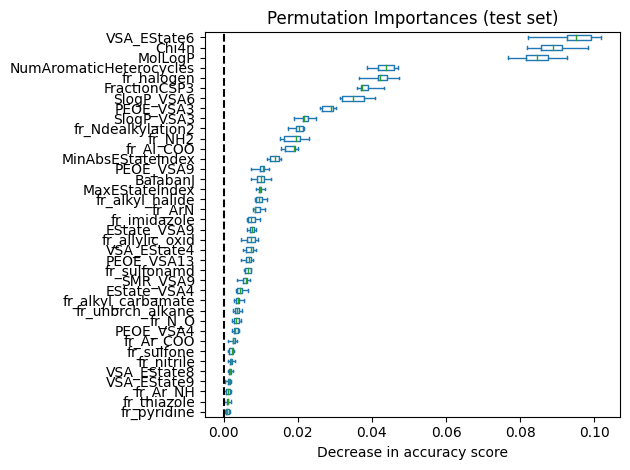

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_elastic_net, X_train_scaling, y_train, n_repeats=10, random_state=SEED, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=30,
                           random_state=SEED, scoring = 'r2')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<35}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

VSA_EState6                        0.100 +/- 0.007
Chi4n                              0.099 +/- 0.009
MolLogP                            0.098 +/- 0.006
fr_halogen                         0.044 +/- 0.005
FractionCSP3                       0.040 +/- 0.005
SlogP_VSA6                         0.038 +/- 0.004
NumAromaticHeterocycles            0.033 +/- 0.006
SlogP_VSA3                         0.026 +/- 0.003
fr_Ndealkylation2                  0.026 +/- 0.005
PEOE_VSA3                          0.022 +/- 0.005
fr_Al_COO                          0.015 +/- 0.003
fr_NH2                             0.015 +/- 0.004
PEOE_VSA9                          0.013 +/- 0.002
fr_alkyl_halide                    0.011 +/- 0.002
fr_ArN                             0.011 +/- 0.003
MinAbsEStateIndex                  0.011 +/- 0.003
MaxEStateIndex                     0.010 +/- 0.002
fr_allylic_oxid                    0.009 +/- 0.002
fr_imidazole                       0.008 +/- 0.002
BalabanJ                       

In [ ]:
scoring = ['r2']
r_multi = permutation_importance(
    best_elastic_net, X_test_scaling, y_test, n_repeats=30, random_state=SEED, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
            print(f"    {X_train.columns[i]:<35}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    VSA_EState6                        0.100 +/- 0.007
    Chi4n                              0.099 +/- 0.009
    MolLogP                            0.098 +/- 0.006
    fr_halogen                         0.044 +/- 0.005
    FractionCSP3                       0.040 +/- 0.005
    SlogP_VSA6                         0.038 +/- 0.004
    NumAromaticHeterocycles            0.033 +/- 0.006
    SlogP_VSA3                         0.026 +/- 0.003
    fr_Ndealkylation2                  0.026 +/- 0.005
    PEOE_VSA3                          0.022 +/- 0.005
    fr_Al_COO                          0.015 +/- 0.003
    fr_NH2                             0.015 +/- 0.004
    PEOE_VSA9                          0.013 +/- 0.002
    fr_alkyl_halide                    0.011 +/- 0.002
    fr_ArN                             0.011 +/- 0.003
    MinAbsEStateIndex                  0.011 +/- 0.003
    MaxEStateIndex                     0.010 +/- 0.002
    fr_allylic_oxid                    0.009 +/- 0.002
    fr_

# permutation test (p-value)

In [ ]:
# from scipy.stats import norm

# # 순열 검정 수행
# permutation_scores = []
# for _ in range(1000):  # 1000회 순열
#     shuffled_y = np.random.permutation(y_test)
#     score = permutation_importance(best_elastic_net, X_test_scaling, shuffled_y,
#                                    n_repeats = 30, random_state = SEED)
#     permutation_scores.append(score.importances_mean)

# # 귀무가설 하 분포 생성
# null_distribution = np.array(permutation_scores)

In [ ]:
# # p-value 계산
# p_values = []
# for i, mean in enumerate(r.importances_mean):
#     # 단측 검정: 귀무가설 하 중요도 > 관측 중요도
#     # p_value = (null_distribution[:, i] >= mean).mean()

#     # 양측 검정: 귀무가설 하 중요도 > 관측 중요도
#     p_value = (null_distribution[:, i] >= mean).mean()
#     p_values.append(p_value)

In [ ]:
# df_pvalues = pd.DataFrame()
# col = []
# pval = []
# imp = []

# for i, p in enumerate(p_values):
#     col.append(X_train.columns[i])
#     imp.append(r.importances_mean[i])
#     pval.append(p)

# df_pvalues['Feature'] = col
# df_pvalues['Importance'] = imp
# df_pvalues['p-value'] = pval

# df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
# print(df_pvalues)

In [ ]:
# # 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
# df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
# df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False)

# print(df_pvalues_005)

In [ ]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

# print(f'# {len(df_pvalues_005)}개')
# print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']))

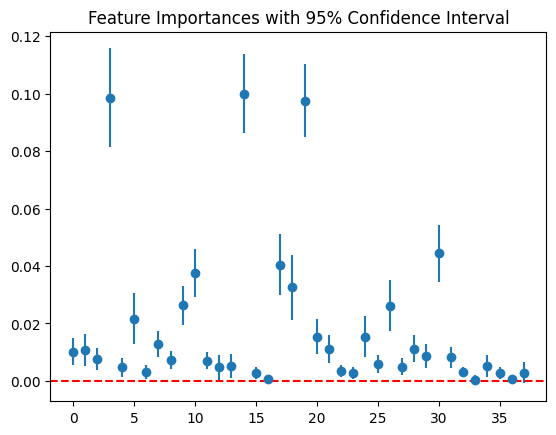

In [ ]:
import matplotlib.pyplot as plt

plt.errorbar(range(len(r.importances_mean)), r.importances_mean, 
             yerr=1.96 * r.importances_std, fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Feature Importances with 95% Confidence Interval")
plt.show()


In [ ]:
# VIF 검사
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data[vif_data['VIF'] > 5])  # VIF > 5는 다중공선성 문제 가능성


                   Variable        VIF
0            MaxEStateIndex  34.796058
2                  BalabanJ  12.736581
3                     Chi4n  25.238180
7                 PEOE_VSA9   5.735631
9                SlogP_VSA3  14.447443
10               SlogP_VSA6  35.831681
13              VSA_EState4   7.357444
14              VSA_EState6  21.468050
17             FractionCSP3  10.460818
18  NumAromaticHeterocycles   6.213734
19                  MolLogP  10.725329
24                   fr_NH2   5.760387


# 예측

In [ ]:
y_pred = best_elastic_net.predict(X_test_scaling)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2.0194456964552643
0.33885637589853235


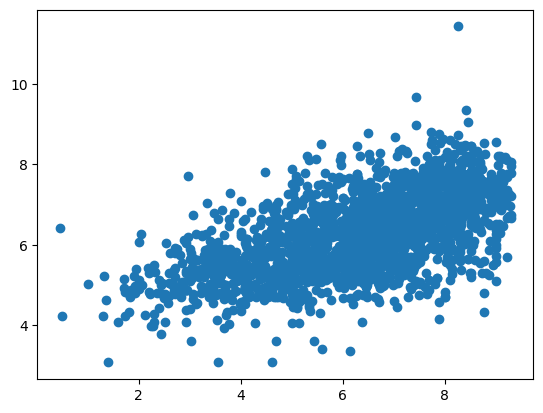

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.show()

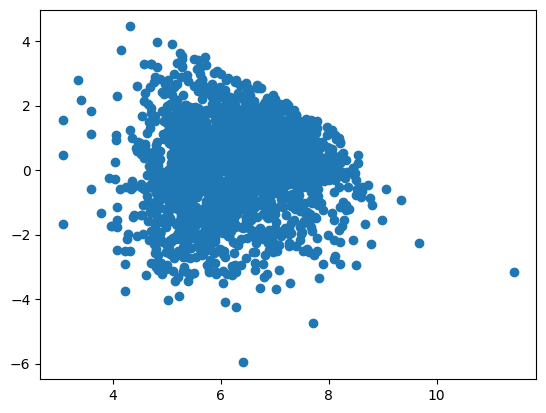

In [ ]:
# 잔차 플랏
resid = y_test - y_pred

plt.scatter(y_pred, resid)
plt.show()

In [ ]:
# # RFE 실행 (최종적으로 10개의 특성 선택)
# num_features = [3, 5, 7, 10, 20]
# for i in num_features:
#     rfe = RFE(estimator=optimal_elastic_net, n_features_to_select= i)
#     rfe.fit(X_train, y_train)

#     # RFE로 선택된 특성 이름 확인
#     selected_features_indices = rfe.support_
#     selected_features_names = X.columns[selected_features_indices]
#     print("최종 선택된 특성:", list(selected_features_names))

# # # 최종 선택된 특성으로 데이터프레임 생성
# # df_final_selected = ISIS_df[selected_features_names.tolist() + ['target']]
# # print("최종 데이터프레임:")
# # print(df_final_selected.head())

# p-value (부트스트랩 사용 X)

In [ ]:
# from sklearn.utils import resample
# from scipy.stats import norm

# best_elastic_net.fit(X_train_scaling, y_train)

# # 원본 계수
# coef = best_elastic_net.coef_

# # 부트스트랩을 통한 유의확률 계산
# n_bootstraps = 1000
# n_features = X_train_scaling.shape[1]
# bootstrap_coefs = np.zeros((n_bootstraps, n_features))

# for i in range(n_bootstraps):
#     # 데이터 재표본화
#     X_resampled, y_resampled = resample(X_train_scaling, y_train, random_state=i)
#     # 재표본화된 데이터로 모델 학습
#     best_elastic_net.fit(X_resampled, y_resampled)
#     bootstrap_coefs[i] = best_elastic_net.coef_

# # 각 계수의 평균 및 표준편차
# coef_mean = np.mean(bootstrap_coefs, axis=0)
# coef_std = np.std(bootstrap_coefs, axis=0)

# # z-값 계산
# z_scores = (coef-coef_mean) / coef_std

# # p-value 계산 (정규분포 가정)
# p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# # 결과 출력
# results = pd.DataFrame({
#     'Feature': [f'Feature_{i}' for i in range(n_features)],
#     'Coefficient': coef,
#     'Std_Error': coef_std,
#     'z_score': z_scores,
#     'p_value': p_values
# })

# print(results)

# # 계수의 신뢰 구간 계산 (95% 신뢰 구간)
# confidence_interval = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)

# # 0을 포함하지 않는 계수는 유의하다고 판단
# significant_coefs = np.where(~((confidence_interval[0] <= 0) & (confidence_interval[1] >= 0)))[0]
# print("Significant coefficients:", significant_coefs)


# t-value (사용 X)

In [ ]:
# best_elastic_net.fit(X_train_scaling, y_train)

# # 예측값
# y_pred = best_elastic_net.predict(X_train_scaling)
# coefficients = best_elastic_net.coef_

# # 잔차
# residuals = y_train - y_pred
# # 잔차 제곱합 SSE
# SSE = np.sum(residuals**2)
# # n-p-1
# n_p_1 = len(y_train) - X_train_scaling.shape[1] - 1
# # 잔차의 표준편차 / 오차분산의 불편추정치
# residual_std = np.sqrt(SSE / n_p_1)

# # 표준 오차 계산
# # (X^{T} * X)^{-1}의 대각선 값 추출
# X = np.array(X_train_scaling)
# XtX_inv_diag = np.diag(np.linalg.inv(np.dot(X.T, X)))
# # 표준 오차
# standard_errors = residual_std * np.sqrt(XtX_inv_diag)

# # t-통계량 계산
# t_statistics = best_elastic_net.coef_ / standard_errors

# # elastic 모형
# e_model = pd.DataFrame({'feature' : X_train.columns,
#                         'coef' : coefficients,
#                         't-value' : t_statistics,
#                         'abs(t-value)' : abs(t_statistics)})
# e_model = e_model.sort_values(by='abs(t-value)', ascending = False)
# e_model


In [ ]:
# e_model[e_model['abs(t-value)'] > 3].index

In [ ]:
# # t-통계량이 3 이상인 변수만 출력
# final_selected_features_index = e_model[e_model['abs(t-value)'] > 3].index

# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(X_train.columns[final_selected_features_index[: i]]))

# print(f'\n#{len(e_model[e_model["abs(t-value)"] > 3].feature)}개')
# print(f'{df_name}_elastic =', list(e_model[e_model['abs(t-value)'] > 3].feature))


# 이건 사용X

In [ ]:
# # feature와 계수 매핑
# final_selected_features = pd.DataFrame({'Feature' : X_train.columns,
#                                        'Coefficient' : coefficients})
# # 계수
# final_selected_features = abs(final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index
# final_selected_features_index

# final_selected_features

In [ ]:
# final_selected_features_index.size

In [ ]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]
# dfs = {}

# for i in num_features:
#     print(f'변수 {i}개: ', list(X_train.columns[final_selected_features_index[: i]]), '\n')
#     dfs[f'df_name_{i}'] = list(X_train.columns[final_selected_features_index[: i]])

In [ ]:
# best_elastic_net.coef_.size 

## OLS 적합 (사용 X)

In [ ]:
# import statsmodels.api as sm

# X_selected = X_train.iloc[:, best_elastic_net.coef_ != 0]  # 계수가 0이 아닌 변수만 선택
# ols_model = sm.OLS(y_train, X_selected).fit()

# ols_model.summary()

In [ ]:
# df_coef = pd.DataFrame({'coef' : ols_model.params,
#                         'pvalue' : ols_model.pvalues,
#                         'abs_coef' : abs(ols_model.params)})
# df_coef = df_coef[df_coef['pvalue'] <= 0.05]
# df_coef = df_coef.sort_values(by = ['pvalue', 'abs_coef'], ascending = [True, False])

# print(list(df_coef.index))
# print(len(list(df_coef.index)))


## permutation importance (사용 X)

In [ ]:
# from sklearn.inspection import permutation_importance

# threshold = 0.05

# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)

# importances = result.importances_mean
# sorted_idx = importances.argsort()[::-1]

# threshold_selected_features = X_train.columns[sorted_idx]
# threshold_selected_features = threshold_selected_features[importances[sorted_idx] >  threshold]
# print(list(threshold_selected_features))
# print(threshold_selected_features.size)


In [ ]:
# import numpy as np
# from sklearn.inspection import permutation_importance


# # 원래 데이터의 Permutation Importance 계산
# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)
# original_importances = result.importances_mean

# # Null Distribution 생성: 피처를 무작위로 섞은 후 Permutation Importance 계산 반복
# n_permutations = 300
# null_distributions = np.zeros((n_permutations, X_test_scaling.shape[1]))

# for i in range(n_permutations):
#     # 타깃(y) 무작위화
#     y_permuted = np.random.permutation(y_test)
#     perm_result = permutation_importance(best_elastic_net, X_test_scaling, y_permuted, random_state = i)
#     null_distributions[i, :] = perm_result.importances_mean

# # p-value 계산: null 분포에서 original_importances보다 큰 값의 비율
# p_values = np.mean(null_distributions >= original_importances, axis=0)

# # 결과 출력
# feature_names = X_train.columns
# for feature, importance, p_value in zip(feature_names, original_importances, p_values):
#     print(f"Feature: {feature}, Importance: {importance:.4f}, p-value: {p_value:.4f}")

# # 유의한 피처 선택
# alpha = 0.05  # 유의 수준
# significant_features = feature_names[p_values <= alpha]
# print(f"Significant features (p < {alpha}): {list(significant_features)}")
